# **Clustering Tourist Reviews for Destination Insights**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:Datasets/google_review_ratings.csv', index_col = 'User')
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN


In [3]:
df.shape

(5456, 25)

In [4]:
df.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
new_names = ['Churches','Resorts','Beaches','Parks','Theatres','Museums','Malls',
             'Zoo','Restaurants','Pubs_and_Bars','Local_services','Pizza_shops','Hotel_and_Lodgings',
             'Juice_shops','ArtGaleery','DanceClubs','SwimmingPool','Gym','Bakery','Beauty_and_Spa','Cafes',
             'Viewpoint','Monuments','Gardens']

In [6]:
df.drop('Unnamed: 25', axis = 1, inplace = True)

In [7]:
df.columns = new_names

In [8]:
df

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_and_Bars,...,ArtGaleery,DanceClubs,SwimmingPool,Gym,Bakery,Beauty_and_Spa,Cafes,Viewpoint,Monuments,Gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


In [9]:
df.shape

(5456, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Churches            5456 non-null   float64
 1   Resorts             5456 non-null   float64
 2   Beaches             5456 non-null   float64
 3   Parks               5456 non-null   float64
 4   Theatres            5456 non-null   float64
 5   Museums             5456 non-null   float64
 6   Malls               5456 non-null   float64
 7   Zoo                 5456 non-null   float64
 8   Restaurants         5456 non-null   float64
 9   Pubs_and_Bars       5456 non-null   float64
 10  Local_services      5456 non-null   object 
 11  Pizza_shops         5455 non-null   float64
 12  Hotel_and_Lodgings  5456 non-null   float64
 13  Juice_shops         5456 non-null   float64
 14  ArtGaleery          5456 non-null   float64
 15  DanceClubs          5456 non-null   float64
 16  S

In [11]:
df.isna().sum()

Churches              0
Resorts               0
Beaches               0
Parks                 0
Theatres              0
Museums               0
Malls                 0
Zoo                   0
Restaurants           0
Pubs_and_Bars         0
Local_services        0
Pizza_shops           1
Hotel_and_Lodgings    0
Juice_shops           0
ArtGaleery            0
DanceClubs            0
SwimmingPool          0
Gym                   0
Bakery                0
Beauty_and_Spa        0
Cafes                 0
Viewpoint             0
Monuments             0
Gardens               1
dtype: int64

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [13]:
df.replace(to_replace = '2\t2.', value ='2.0', inplace=True)

In [14]:
df['Local_services'] = df['Local_services'].astype(float)

In [15]:
df.fillna({'Pizza_shops':df['Pizza_shops'].median()}, inplace=True)
df.fillna({'Gardens':df['Gardens'].median()}, inplace=True)

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums','Malls', 'Zoo', 'Restaurants', 'Pubs_and_Bars', 'Local_services',
               'Pizza_shops', 'Hotel_and_Lodgings','Juice_shops', 'ArtGaleery','DanceClubs', 'SwimmingPool', 'Gym', 'Bakery', 'Beauty_and_Spa','Cafes',
               'Viewpoint', 'Monuments', 'Gardens']])

df[['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums','Malls', 'Zoo', 'Restaurants', 'Pubs_and_Bars', 'Local_services',
               'Pizza_shops', 'Hotel_and_Lodgings','Juice_shops', 'ArtGaleery','DanceClubs', 'SwimmingPool', 'Gym', 'Bakery', 'Beauty_and_Spa','Cafes',
               'Viewpoint', 'Monuments', 'Gardens']]=scaler.transform(df[['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums','Malls', 
                                                                          'Zoo', 'Restaurants', 'Pubs_and_Bars', 'Local_services','Pizza_shops', 'Hotel_and_Lodgings','Juice_shops', 
                                                                          'ArtGaleery','DanceClubs', 'SwimmingPool', 'Gym', 'Bakery', 'Beauty_and_Spa','Cafes',
                                                                          'Viewpoint', 'Monuments', 'Gardens']])

In [17]:
df.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_and_Bars,...,ArtGaleery,DanceClubs,SwimmingPool,Gym,Bakery,Beauty_and_Spa,Cafes,Viewpoint,Monuments,Gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.429952,0.358173,0.439141,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.1,0.726,0.671463,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0


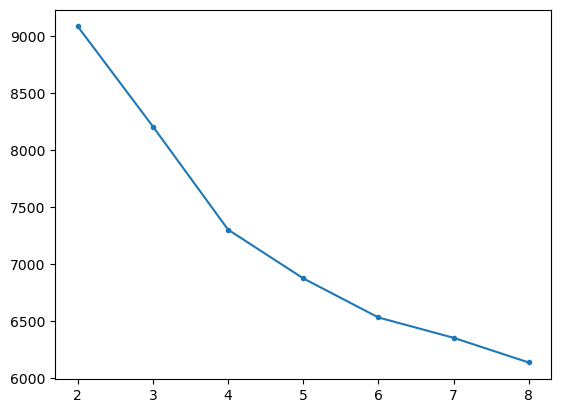

In [18]:
# Elbow method
sse = []
range_n_cluster = [2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    K = KMeans(n_clusters=num_cluster,max_iter=50)
    K.fit(df)
    sse.append(K.inertia_)
plt.plot(range_n_cluster,sse, marker = '.')
plt.show()

In [19]:
kmns = KMeans(n_clusters = 4, max_iter = 50,random_state=0)
kmns.fit(df)

KMeans(max_iter=50, n_clusters=4, random_state=0)

In [20]:
kmns.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [21]:
# assign Labels
df['cluster'] = kmns.labels_
df.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_and_Bars,...,DanceClubs,SwimmingPool,Gym,Bakery,Beauty_and_Spa,Cafes,Viewpoint,Monuments,Gardens,cluster
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.429952,0.358173,0.439141,...,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.1,0.726,0.671463,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1
User 5,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1


In [22]:
df['cluster'].value_counts()

cluster
1    1818
0    1557
3    1084
2     997
Name: count, dtype: int64

In [23]:
x = df[['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums','Malls', 'Zoo', 'Restaurants', 'Pubs_and_Bars', 'Local_services','Pizza_shops', 'Hotel_and_Lodgings','Juice_shops', 'ArtGaleery','DanceClubs', 'SwimmingPool', 'Gym', 'Bakery', 'Beauty_and_Spa','Cafes','Viewpoint', 'Monuments', 'Gardens']]

In [24]:
y_kmns = kmns.fit_predict(x)
y_kmns

array([1, 1, 1, ..., 3, 3, 3])

In [25]:
from sklearn.decomposition import PCA

# reduceing dimension to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

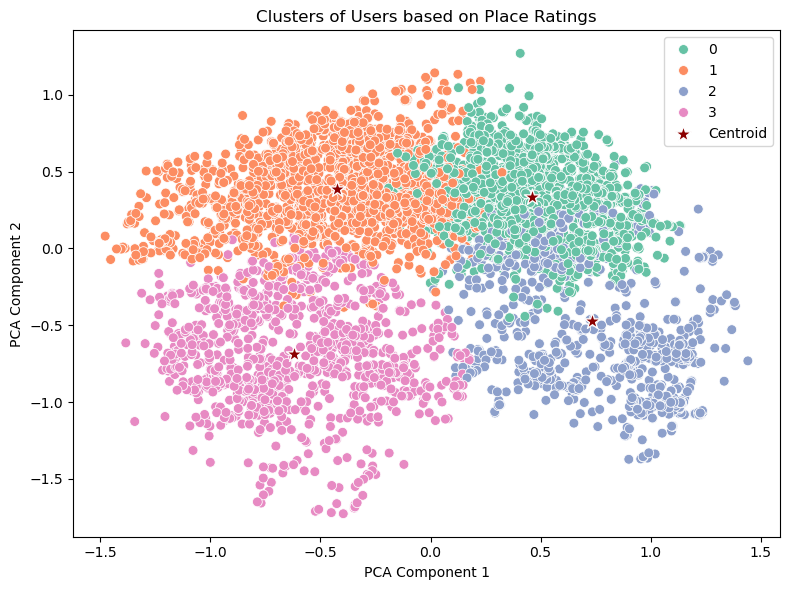

In [26]:
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y_kmns, palette="Set2", s=50)

# Plot centroids (also transformed into PCA space)
centers_pca = pca.transform(kmns.cluster_centers_)
sns.scatterplot(x=centers_pca[:,0], y=centers_pca[:,1], 
                color="darkred", s=150, marker="*", label="Centroid")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Users based on Place Ratings")
plt.tight_layout()
plt.legend()
plt.show()

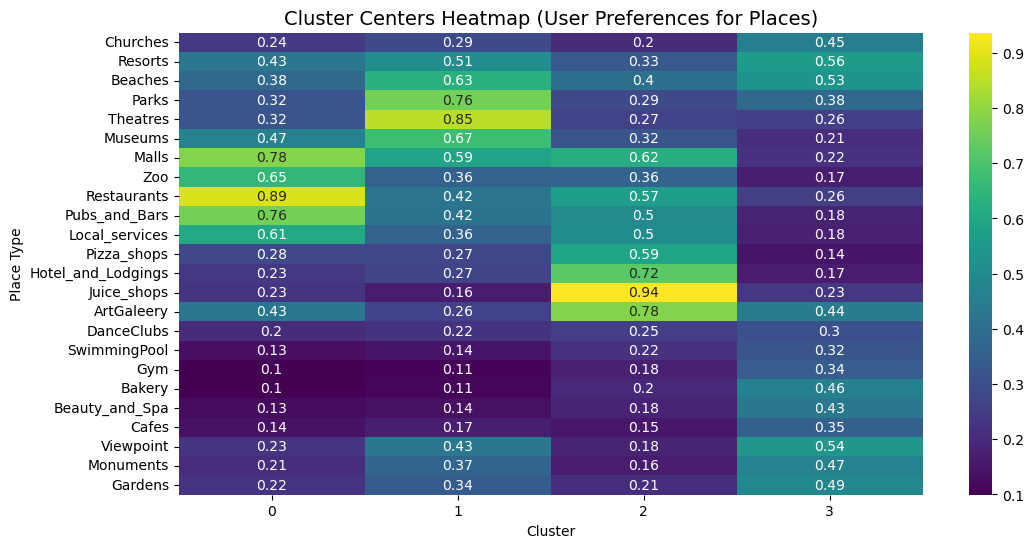

In [27]:
cluster_centers = pd.DataFrame(kmns.cluster_centers_, columns=x.columns)

plt.figure(figsize=(12,6))
sns.heatmap(cluster_centers.T, cmap="viridis", annot=True, cbar=True)

plt.title("Cluster Centers Heatmap (User Preferences for Places)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Place Type")
plt.show()

### Understanding and Conclusions

* Cluster 0 (left column):High on Restaurants (0.89), Malls (0.78), Pubs & Bars (0.76) → looks like “Foodies & Shoppers”.

* Cluster 1:Strong preference for Parks (0.76), Theatres (0.85), Museums (0.67) → this cluster is more “Culture & Nature Lovers”.

* Cluster 2:Top spot for Juice shops (0.94), Hotels & Lodgings (0.72) → kind of “Travelers / Wellness seekers”.

* Cluster 3 (last one):More balanced, but shows interest in Viewpoints (0.54), Bakery (0.46), Beauty & Spa (0.43) → maybe “Casual Leisure Crowd”.